In [1]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cwd = os.getcwd()
timeseries_df = pd.read_csv(cwd + "/datasets/timeseries_with_wav.csv")
timeseries_df = timeseries_df.drop('Unnamed: 0', axis=1)

In [3]:
timeseries_df

,Millis,ECG,IR,RED,patient,datetime,rate_avg,rate_std,rate_min,rate_max
0,892,226.0,28556.0,28966.0,1,2023-10-18 09:38:39,0.000000,0.000000,0,0
1,893,226.0,28554.0,28959.0,1,2023-10-18 09:38:39,0.000000,0.000000,0,0
2,893,226.0,28556.0,28960.0,1,2023-10-18 09:38:39,0.000000,0.000000,0,0
3,893,226.0,28552.0,28959.0,1,2023-10-18 09:38:39,0.000000,0.000000,0,0
4,894,226.0,28551.0,28954.0,1,2023-10-18 09:38:39,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...
547272,157,219.0,26252.0,29845.0,41,2023-10-27 15:56:43,57.552448,797.614263,-1534,911
547273,168,219.0,26254.0,29843.0,41,2023-10-27 15:56:43,550.286713,1328.394839,-1538,2144
547274,170,219.0,26252.0,29844.0,41,2023-10-27 15:56:43,1184.440559,257.112438,602,1880
547275,172,219.0,26250.0,29843.0,41,2023-10-27 15:56:43,-1232.818182,903.267175,-2660,565


In [4]:
timeseries_df = timeseries_df.drop(columns=['datetime'])

In [5]:
result_df = pd.read_csv(cwd + "/datasets/patient.csv")
result_df = result_df.drop('Unnamed: 0', axis=1)
filtered_df = result_df[(result_df['result'] == 'LA') | (result_df['result'] == 'LA DİLATASYONU')]
filtered_df.loc[:, 'result'] = filtered_df['result'].apply(lambda x: 0 if x == 'LA' else 1)
timeseries_df = pd.merge(timeseries_df, filtered_df, on='patient')

In [6]:
timeseries_df.isna().sum()

Millis      0
ECG         0
IR          0
RED         0
patient     0
rate_avg    0
rate_std    0
rate_min    0
rate_max    0
result      0
dtype: int64

In [7]:
timeseries_df.corr()

,Millis,ECG,IR,RED,patient,rate_avg,rate_std,rate_min,rate_max,result
Millis,1.000000,0.006780,0.002464,0.000326,0.001208,-0.000193,0.001878,-0.001189,0.000789,-0.000965
ECG,0.006780,1.000000,-0.076462,-0.088521,-0.331177,0.000046,0.002560,-0.000921,0.002249,-0.001460
IR,0.002464,-0.076462,1.000000,0.803839,0.256924,0.000006,0.059375,-0.041006,0.040226,0.020474
RED,0.000326,-0.088521,0.803839,1.000000,0.278786,-0.000006,0.020281,-0.013951,0.013636,-0.089571
patient,0.001208,-0.331177,0.256924,0.278786,1.000000,0.000059,0.028234,-0.020882,0.019263,-0.012369
rate_avg,-0.000193,0.000046,0.000006,-0.000006,0.000059,1.000000,0.017213,0.724805,0.729323,0.000054
rate_std,0.001878,0.002560,0.059375,0.020281,0.028234,0.017213,1.000000,-0.654880,0.674807,-0.048872
rate_min,-0.001189,-0.000921,-0.041006,-0.013951,-0.020882,0.724805,-0.654880,1.000000,0.103698,0.035994
rate_max,0.000789,0.002249,0.040226,0.013636,0.019263,0.729323,0.674807,0.103698,1.000000,-0.034815
result,-0.000965,-0.001460,0.020474,-0.089571,-0.012369,0.000054,-0.048872,0.035994,-0.034815,1.000000


/home/honorsea/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


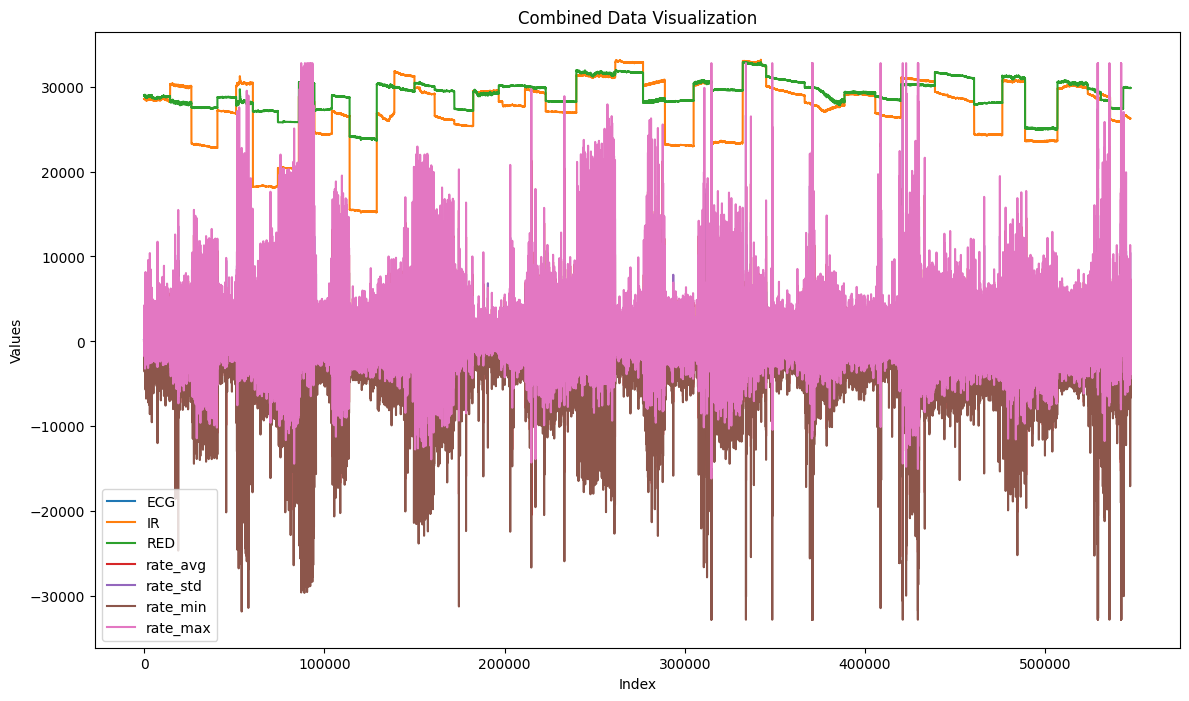

In [8]:
plt.figure(figsize=(14, 8))

plt.plot(timeseries_df['ECG'], label='ECG')
plt.plot(timeseries_df['IR'], label='IR')
plt.plot(timeseries_df['RED'], label='RED')
plt.plot(timeseries_df['rate_avg'], label='rate_avg')
plt.plot(timeseries_df['rate_std'], label='rate_std')
plt.plot(timeseries_df['rate_min'], label='rate_min')
plt.plot(timeseries_df['rate_max'], label='rate_max')

plt.title('Combined Data Visualization')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

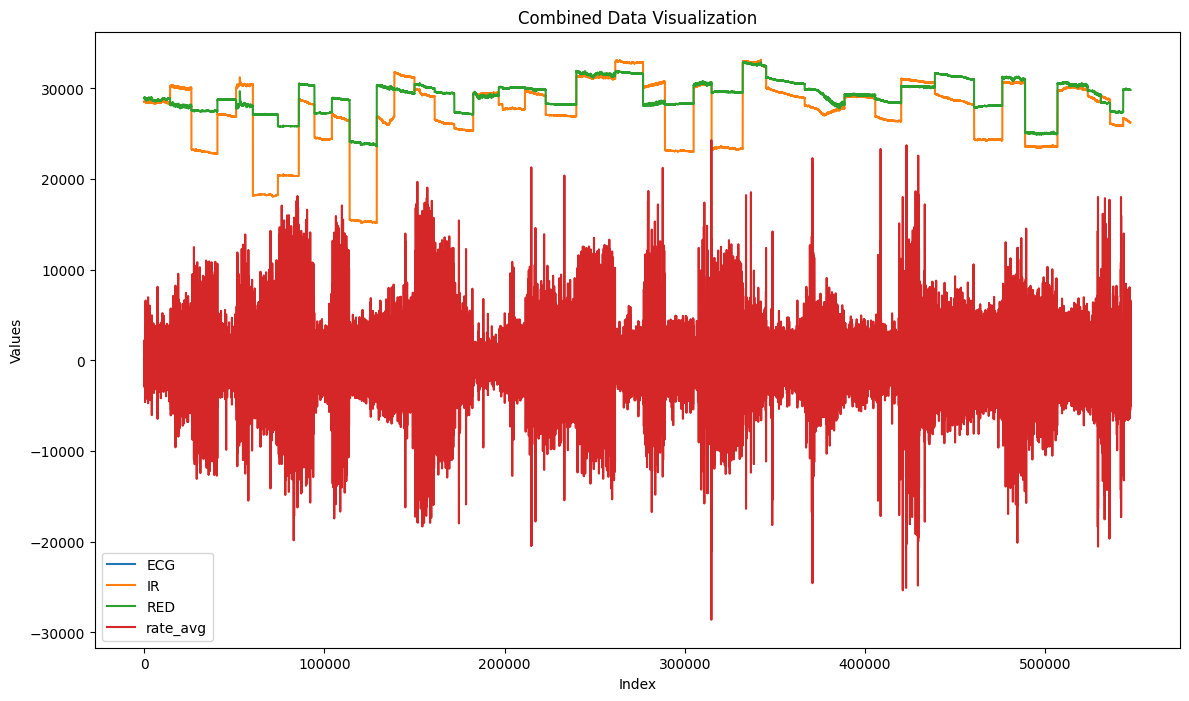

In [9]:
plt.figure(figsize=(14, 8))

plt.plot(timeseries_df['ECG'], label='ECG')
plt.plot(timeseries_df['IR'], label='IR')
plt.plot(timeseries_df['RED'], label='RED')
plt.plot(timeseries_df['rate_avg'], label='rate_avg')

plt.title('Combined Data Visualization')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

In [10]:
patients = timeseries_df['patient'].unique()

expanded_df = pd.DataFrame()

# Her hasta için sütunları yeniden adlandırma ve birleştirme
for patient in patients:
    patient_df = timeseries_df[timeseries_df['patient'] == patient].drop(columns='patient').reset_index(drop=True)
    patient_df = patient_df.add_prefix(f"patient{patient}_")
    expanded_df = pd.concat([expanded_df, patient_df], axis=1)

expanded_df

,patient1_Millis,patient1_ECG,patient1_IR,patient1_RED,patient1_rate_avg,patient1_rate_std,patient1_rate_min,patient1_rate_max,patient1_result,patient2_Millis,...,patient40_result,patient41_Millis,patient41_ECG,patient41_IR,patient41_RED,patient41_rate_avg,patient41_rate_std,patient41_rate_min,patient41_rate_max,patient41_result
0,892.0,226.0,28556.0,28966.0,0.0,0.0,0.0,0.0,1,507.0,...,1,108.0,247.0,26704.0,29857.0,0.0,0.0,0.0,0.0,1
1,893.0,226.0,28554.0,28959.0,0.0,0.0,0.0,0.0,1,509.0,...,1,116.0,248.0,26705.0,29857.0,0.0,0.0,0.0,0.0,1
2,893.0,226.0,28556.0,28960.0,0.0,0.0,0.0,0.0,1,510.0,...,1,118.0,248.0,26705.0,29856.0,0.0,0.0,0.0,0.0,1
3,893.0,226.0,28552.0,28959.0,0.0,0.0,0.0,0.0,1,511.0,...,1,121.0,248.0,26705.0,29855.0,0.0,0.0,0.0,0.0,1
4,894.0,226.0,28551.0,28954.0,0.0,0.0,0.0,0.0,1,511.0,...,1,123.0,246.0,26705.0,29857.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
expanded_df.corr()

,patient1_Millis,patient1_ECG,patient1_IR,patient1_RED,patient1_rate_avg,patient1_rate_std,patient1_rate_min,patient1_rate_max,patient1_result,patient2_Millis,...,patient40_result,patient41_Millis,patient41_ECG,patient41_IR,patient41_RED,patient41_rate_avg,patient41_rate_std,patient41_rate_min,patient41_rate_max,patient41_result
patient1_Millis,1.000000,-0.021205,0.068174,-0.013733,-0.000216,0.002386,-0.000314,0.000917,NaN,-0.331136,...,NaN,-0.103210,-0.121004,0.081791,0.043554,-0.001187,-0.009762,0.007004,-0.010196,NaN
patient1_ECG,-0.021205,1.000000,-0.015868,0.028348,0.000224,0.111759,-0.076255,0.077245,NaN,-0.030508,...,NaN,-0.029714,-0.025079,0.011319,0.038038,0.000073,-0.075581,0.068431,-0.064402,NaN
patient1_IR,0.068174,-0.015868,1.000000,0.561065,-0.000340,0.010445,-0.007052,0.005680,NaN,0.029437,...,NaN,-0.055111,0.066690,-0.051271,-0.571211,-0.000061,0.150206,-0.126448,0.127433,NaN
patient1_RED,-0.013733,0.028348,0.561065,1.000000,0.000105,0.013089,-0.008325,0.007617,NaN,0.032777,...,NaN,-0.074950,0.079219,-0.124911,-0.455974,-0.000408,0.168207,-0.141612,0.140583,NaN
patient1_rate_avg,-0.000216,0.000224,-0.000340,0.000105,1.000000,-0.002761,0.724900,0.725014,NaN,-0.000784,...,NaN,0.003963,0.000555,0.000044,0.000425,-0.011244,0.002293,-0.008095,-0.000916,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
patient41_rate_avg,-0.001187,0.000073,-0.000061,-0.000408,-0.011244,-0.001869,-0.007977,-0.011560,NaN,0.001402,...,NaN,0.003570,-0.000676,0.000172,0.000606,1.000000,0.011381,0.519634,0.533634,NaN
patient41_rate_std,-0.009762,-0.075581,0.150206,0.168207,0.002293,0.004401,-0.001930,0.004975,NaN,-0.104448,...,NaN,0.150260,-0.006996,0.137320,0.035455,0.011381,1.000000,-0.821570,0.824368,NaN
patient41_rate_min,0.007004,0.068431,-0.126448,-0.141612,-0.008095,-0.003757,-0.003959,-0.010095,NaN,0.089087,...,NaN,-0.127386,0.005594,-0.114463,-0.030377,0.519634,-0.821570,1.000000,-0.371728,NaN
patient41_rate_max,-0.010196,-0.064402,0.127433,0.140583,-0.000916,0.006392,-0.006246,0.002512,NaN,-0.083479,...,NaN,0.125392,-0.005966,0.114764,0.027469,0.533634,0.824368,-0.371728,1.000000,NaN


In [12]:
def add_suffix_to_list_elements(lst, suffix):
    return [element + suffix for element in lst]

In [13]:
la_list= ['patient2_', 'patient3_', 'patient5_', 'patient6_', 
          'patient9_', 'patient13_', 'patient14_', 'patient15_', 
          'patient26_', 'patient32_', 'patient33_', 'patient34_', 
          'patient35_', 'patient37_', 'patient38_']
dil_list= ['patient1_', 'patient4_', 'patient7_', 'patient8_', 
          'patient10_', 'patient11_', 'patient12_', 'patient16_',
          'patient17_', 'patient18_', 'patient19_', 'patient20_', 
          'patient21_', 'patient22_', 'patient23_', 'patient24_', 
          'patient25_', 'patient27_', 'patient28_', 'patient29_', 
          'patient30_', 'patient31_', 'patient36_', 'patient39_',
          'patient40_', 'patient41_']
la_list_ecg = add_suffix_to_list_elements(la_list, 'ECG')
la_list_ir = add_suffix_to_list_elements(la_list, 'IR')
la_list_red = add_suffix_to_list_elements(la_list, 'RED')
la_list_avg = add_suffix_to_list_elements(la_list, 'rate_avg')
dil_list_ecg = add_suffix_to_list_elements(dil_list, 'ECG')
dil_list_ir = add_suffix_to_list_elements(dil_list, 'IR')
dil_list_red = add_suffix_to_list_elements(dil_list, 'RED')
dil_list_avg = add_suffix_to_list_elements(dil_list, 'rate_avg')

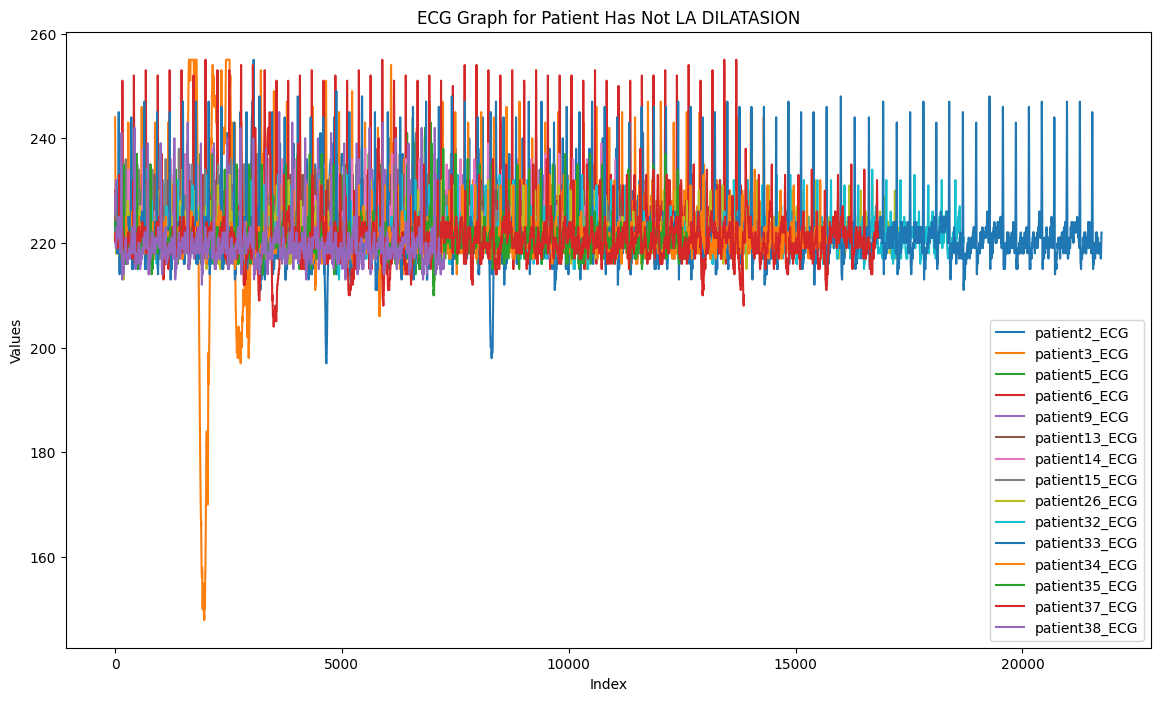

In [14]:
plt.figure(figsize=(14, 8))

ecg_la = expanded_df[la_list_ecg]
for col in la_list_ecg:
    plt.plot(ecg_la[col], label=col)


plt.title('ECG Graph for Patient Has Not LA DILATASION')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

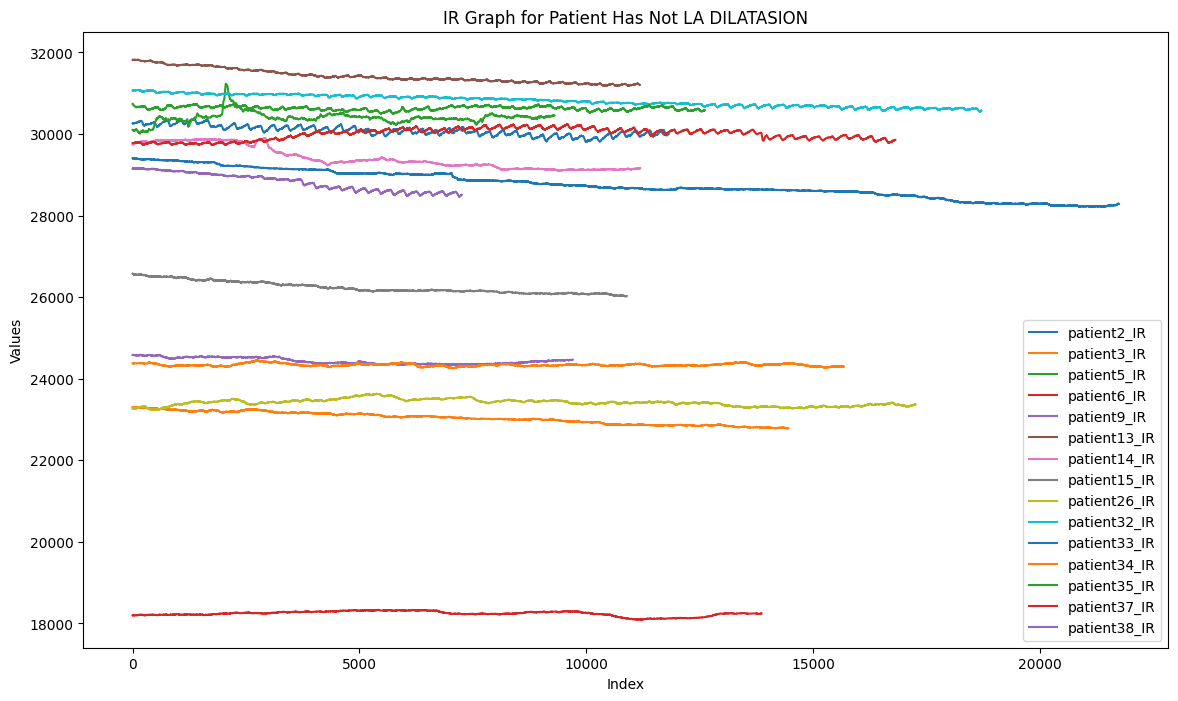

In [15]:
plt.figure(figsize=(14, 8))

ir_la = expanded_df[la_list_ir]
for col in la_list_ir:
    plt.plot(ir_la[col], label=col)


plt.title('IR Graph for Patient Has Not LA DILATASION')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

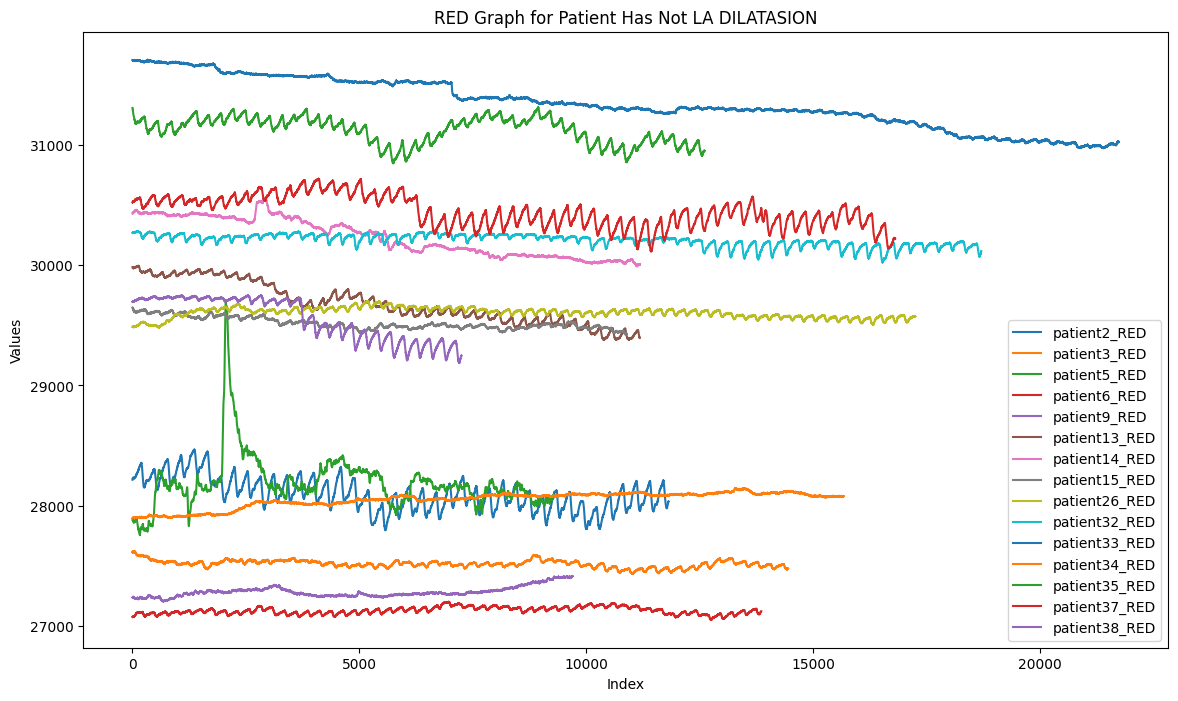

In [16]:
plt.figure(figsize=(14, 8))

red_la = expanded_df[la_list_red]
for col in la_list_red:
    plt.plot(red_la[col], label=col)


plt.title('RED Graph for Patient Has Not LA DILATASION')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

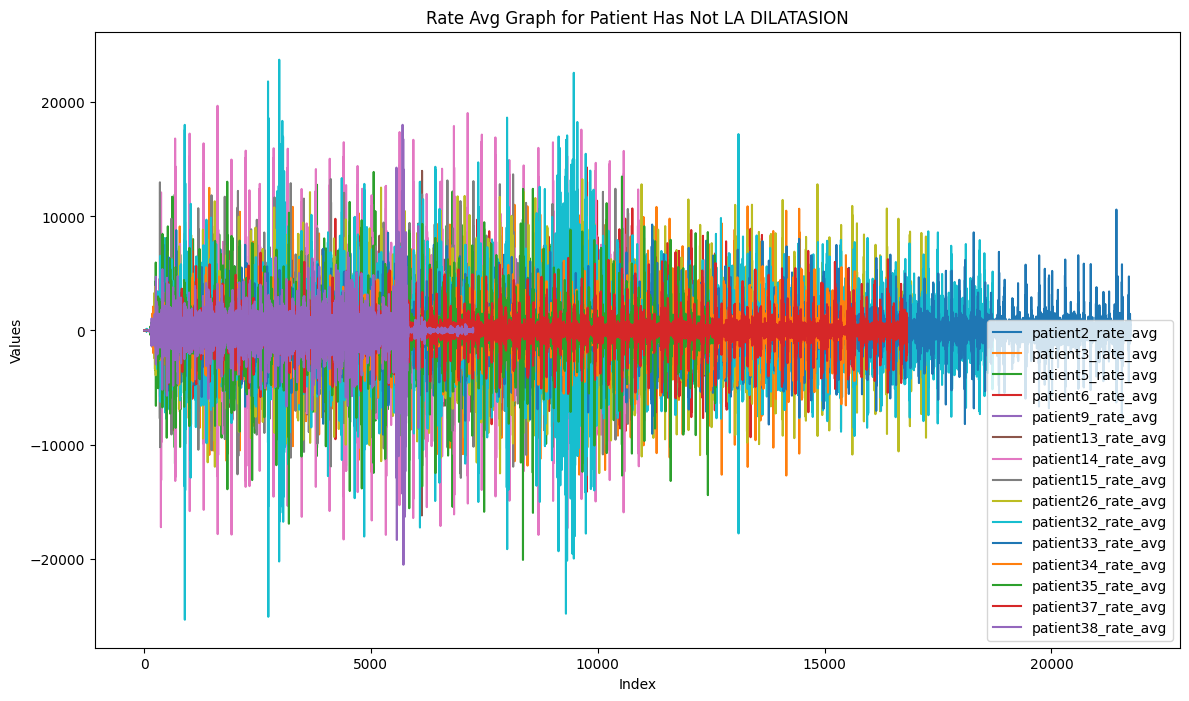

In [17]:
plt.figure(figsize=(14, 8))

avg_la = expanded_df[la_list_avg]
for col in la_list_avg:
    plt.plot(avg_la[col], label=col)


plt.title('Rate Avg Graph for Patient Has Not LA DILATASION')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

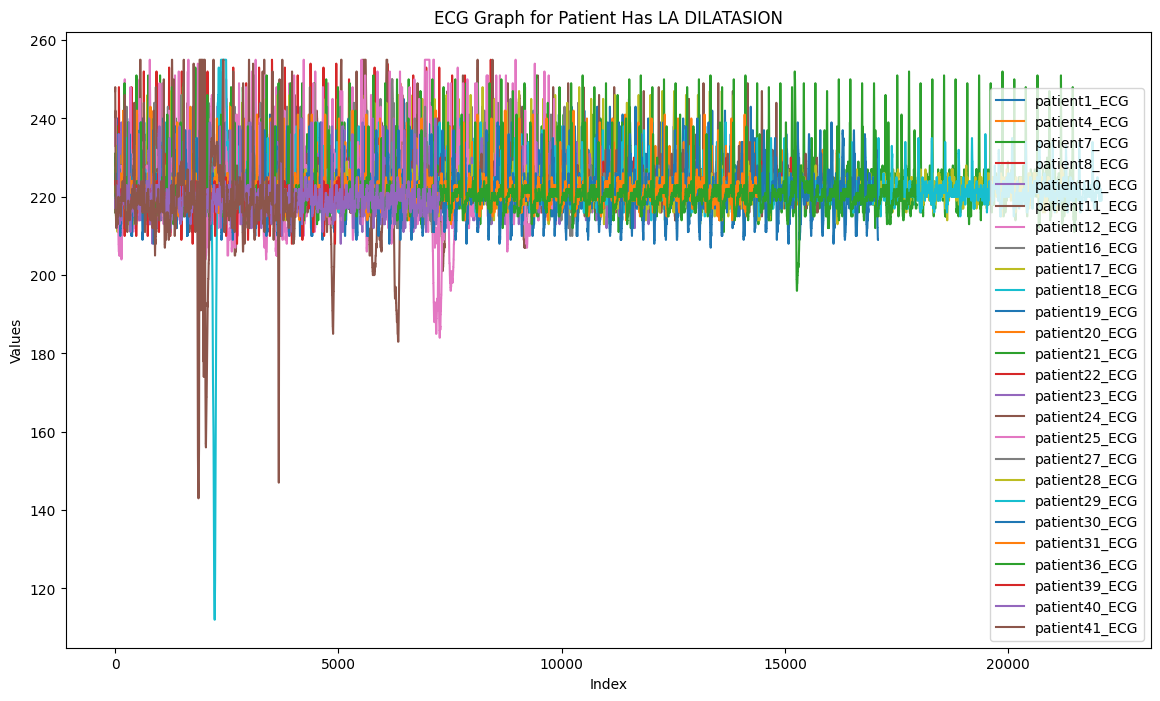

In [18]:
plt.figure(figsize=(14, 8))

ecg_dil = expanded_df[dil_list_ecg]
for col in dil_list_ecg:
    plt.plot(ecg_dil[col], label=col)


plt.title('ECG Graph for Patient Has LA DILATASION')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

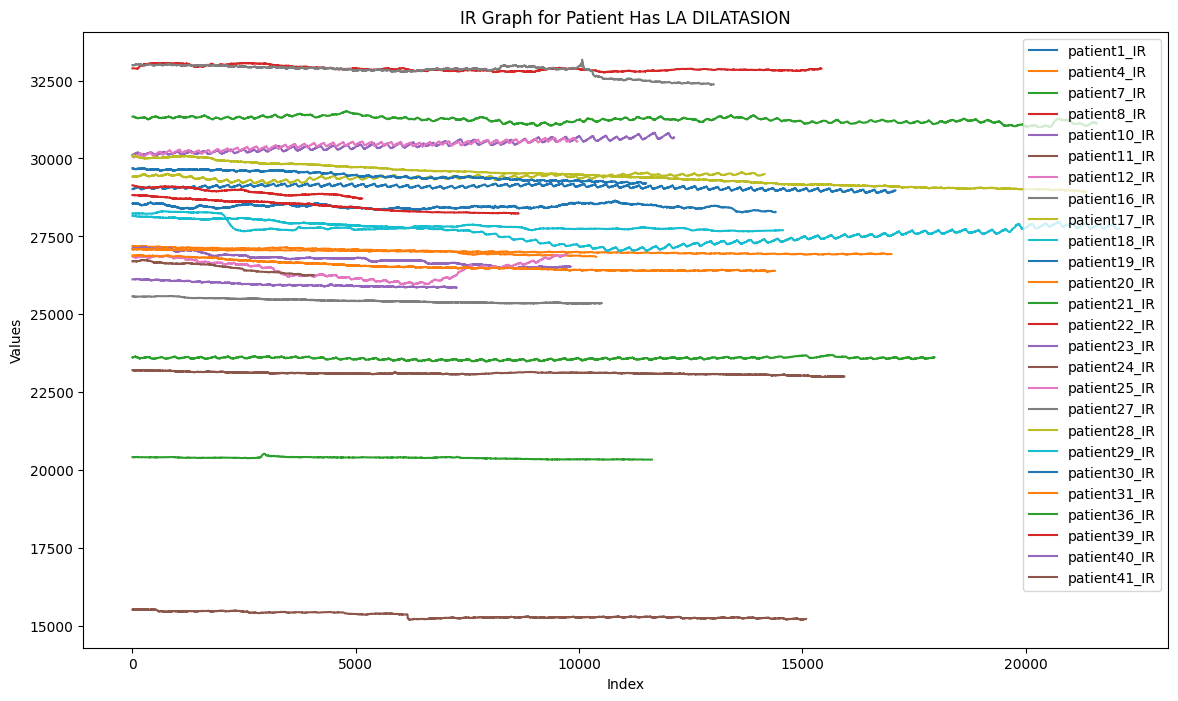

In [19]:
plt.figure(figsize=(14, 8))

ir_dil = expanded_df[dil_list_ir]
for col in dil_list_ir:
    plt.plot(ir_dil[col], label=col)


plt.title('IR Graph for Patient Has LA DILATASION')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

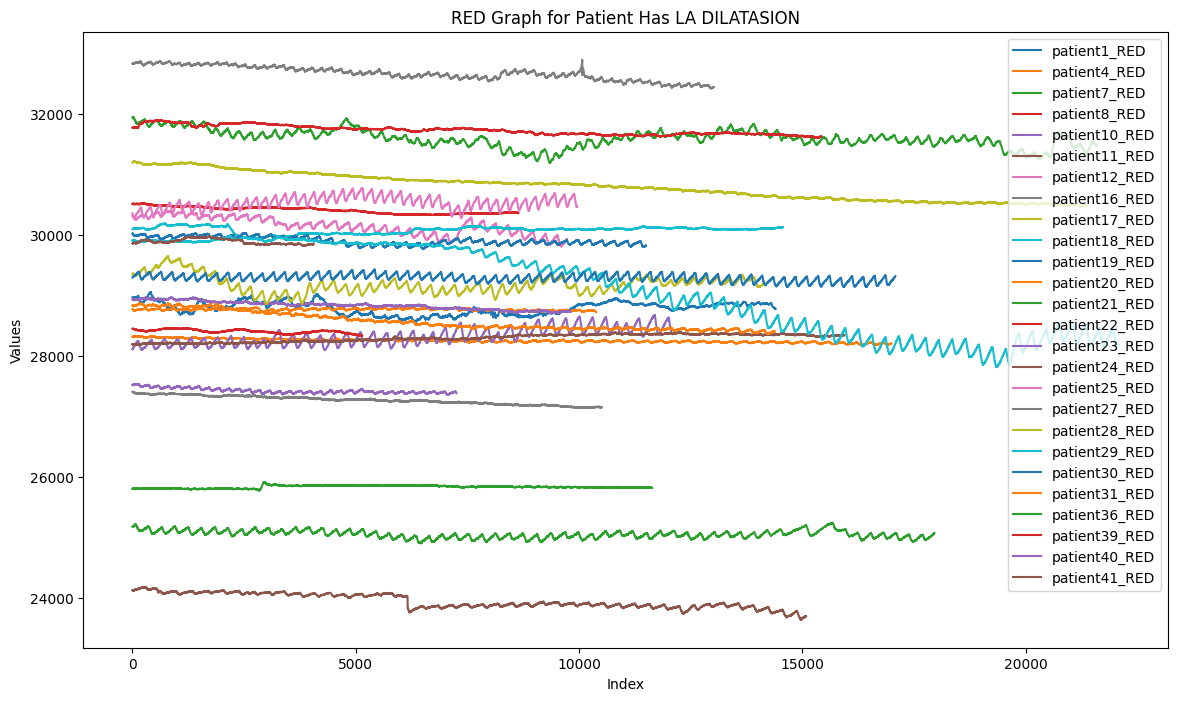

In [20]:
plt.figure(figsize=(14, 8))

red_dil = expanded_df[dil_list_red]
for col in dil_list_red:
    plt.plot(red_dil[col], label=col)


plt.title('RED Graph for Patient Has LA DILATASION')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

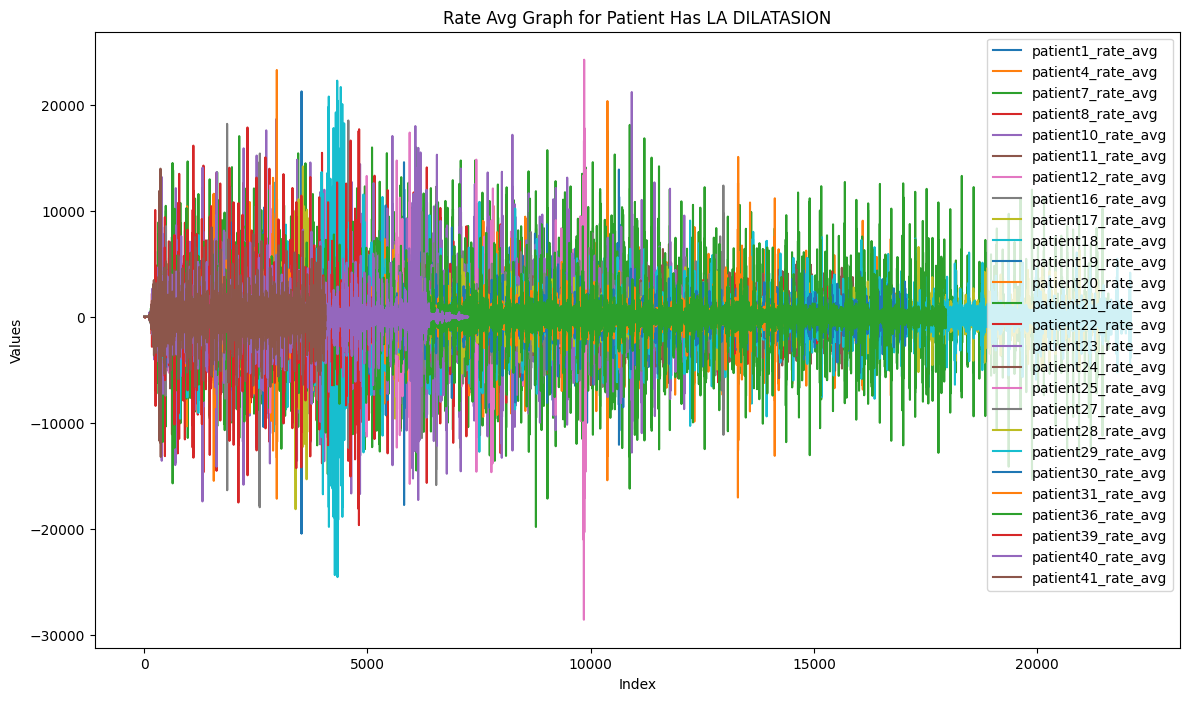

In [21]:
plt.figure(figsize=(14, 8))

avg_dil = expanded_df[dil_list_avg]
for col in dil_list_avg:
    plt.plot(avg_dil[col], label=col)


plt.title('Rate Avg Graph for Patient Has LA DILATASION')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

In [22]:
x = timeseries_df.drop('result', axis=1)
y = timeseries_df['result']

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4, whiten=True)
pca.fit(x)
x_pca = pca.transform(x)
print('varience ratio: ', pca.explained_variance_ratio_)
print('sum: ', sum(pca.explained_variance_ratio_))

varience ratio:  [0.62545386 0.20571583 0.12517258 0.03823845]
sum:  0.9945807254169966


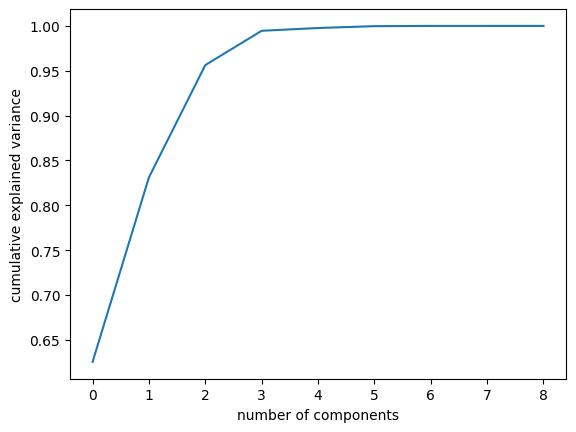

In [24]:
pca = PCA(whiten=True).fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [25]:
pca.explained_variance_ratio_

array([6.25453859e-01, 2.05715832e-01, 1.25172580e-01, 3.82384544e-02,
       3.07866278e-03, 2.08938593e-03, 2.46030849e-04, 4.32166677e-06,
       8.73359586e-07])

In [26]:
df_sns = pd.DataFrame({'var':pca.explained_variance_ratio_, 'PC':['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9']})
df_sns

,var,PC
0,6.254539e-01,PCA1
1,2.057158e-01,PCA2
2,1.251726e-01,PCA3
3,3.823845e-02,PCA4
4,3.078663e-03,PCA5
5,2.089386e-03,PCA6
6,2.460308e-04,PCA7
7,4.321667e-06,PCA8
8,8.733596e-07,PCA9


In [27]:
import seaborn as sns

<Axes: xlabel='PC', ylabel='var'>

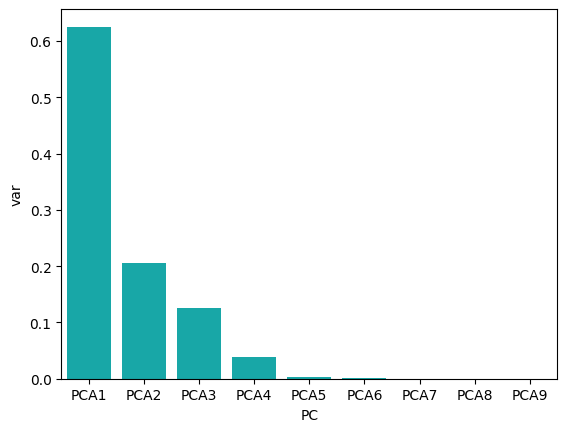

In [28]:
sns.barplot(x='PC', y='var', data=df_sns, color='c')

/tmp/ipykernel_621023/3919618689.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


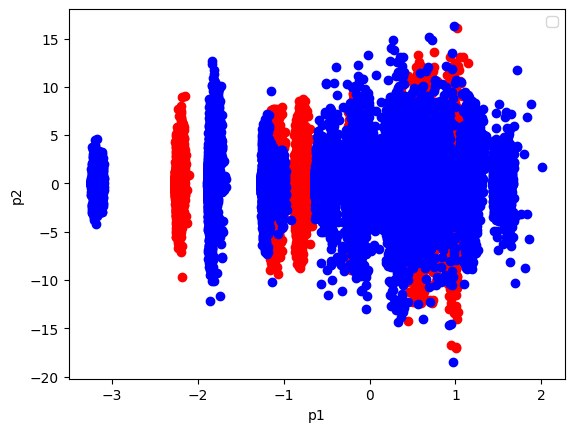

In [36]:
x["p1"] = x_pca[:, 0]
x["p2"] = x_pca[:, 1]
x["p3"] = x_pca[:, 2]

color = ["red", "blue"]

for each in range(2):
    plt.scatter(x.p1[y == each], x.p2[y == each], color=color[each])

plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()

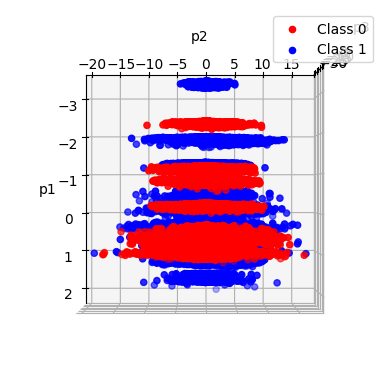

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


color = ["red", "blue"]

def plot_3d_scatter(elev=30, azim=30):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    for each in range(2):
        ax.scatter(
            x.p1[y == each], 
            x.p2[y == each], 
            x.p3[y == each], 
            color=color[each], 
            label=f'Class {each}'
        )

    ax.set_xlabel('p1')
    ax.set_ylabel('p2')
    ax.set_zlabel('p3')
    ax.view_init(elev=elev, azim=azim)
    plt.legend()
    plt.show()

plot_3d_scatter(elev=90, azim=0)  


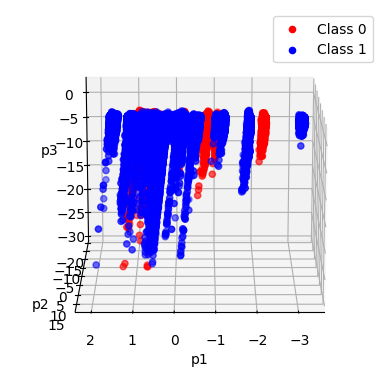

In [53]:
plot_3d_scatter(elev=15, azim=90)

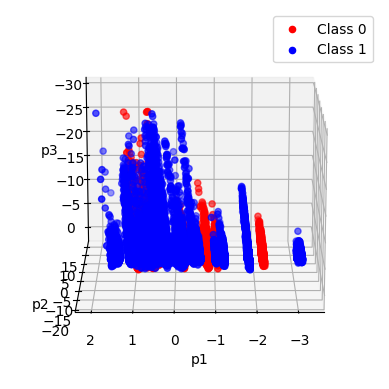

In [55]:
plot_3d_scatter(elev=195, azim=90)

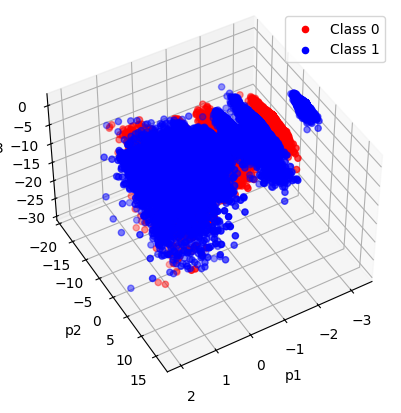

In [71]:
plot_3d_scatter(elev=45, azim=60)

In [31]:
timeseries_df

,Millis,ECG,IR,RED,patient,rate_avg,rate_std,rate_min,rate_max,result
0,892,226.0,28556.0,28966.0,1,0.000000,0.000000,0,0,1
1,893,226.0,28554.0,28959.0,1,0.000000,0.000000,0,0,1
2,893,226.0,28556.0,28960.0,1,0.000000,0.000000,0,0,1
3,893,226.0,28552.0,28959.0,1,0.000000,0.000000,0,0,1
4,894,226.0,28551.0,28954.0,1,0.000000,0.000000,0,0,1
...,...,...,...,...,...,...,...,...,...,...
547272,157,219.0,26252.0,29845.0,41,57.552448,797.614263,-1534,911,1
547273,168,219.0,26254.0,29843.0,41,550.286713,1328.394839,-1538,2144,1
547274,170,219.0,26252.0,29844.0,41,1184.440559,257.112438,602,1880,1
547275,172,219.0,26250.0,29843.0,41,-1232.818182,903.267175,-2660,565,1


In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(timeseries_df.drop('result', axis=1))

# PCA uygulama
pca = PCA(n_components=4)
pca.fit(scaled_data)

# PCA bileşenlerinin yükleri (loadings)
loadings = pca.components_.T

# Yükleri DataFrame olarak görüntüleme
loadings_df = pd.DataFrame(loadings, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4'], index=timeseries_df.drop('result', axis=1).columns)

print(loadings_df)

              PCA1      PCA2      PCA3      PCA4
Millis    0.000190  0.001625  0.002366  0.032841
ECG      -0.037930 -0.196157  0.131684  0.740661
IR        0.113751  0.548742 -0.263939  0.318203
RED       0.110163  0.541522 -0.296644  0.298606
patient   0.072274  0.355770 -0.187363 -0.509302
rate_avg  0.668583 -0.160305 -0.045646 -0.000761
rate_std  0.124812  0.311740  0.643492 -0.016582
rate_min  0.419372 -0.330990 -0.466337  0.011551
rate_max  0.574289  0.090280  0.395287 -0.011251
